#### -------------------------------------------- Business Objective:- Build a predictive model the furniture sales of a certain store -----------------------------------------------

## Importing Libraries...

In [302]:
import pandas as pd
from tabulate import tabulate
import  matplotlib.pyplot as plt
import seaborn as sb
from pandas_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
from warnings import filterwarnings
filterwarnings('ignore')
sb.set_theme(style="darkgrid")
sb.set(rc={'figure.facecolor':'skyblue'})

## Importing dataset

In [303]:
data1=pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')
data1.head(3)
data1.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7253,7254,CA-2016-152730,2016-05-30,2016-06-04,Standard Class,EM-14140,Eugene Moren,Home Office,United States,Superior,...,54880,Central,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",364.74,3,0.0,109.422
3064,3065,CA-2017-106859,2017-03-13,2017-03-18,Second Class,BF-11215,Benjamin Farhat,Home Office,United States,Albuquerque,...,87105,West,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",90.80,8,0.0,25.424
4292,4293,CA-2017-102407,2017-12-09,2017-12-13,Second Class,AT-10435,Alyssa Tate,Home Office,United States,Los Angeles,...,90004,West,OFF-AP-10001394,Office Supplies,Appliances,Harmony Air Purifier,189.00,1,0.0,68.040


---------------------------------------------------------------------------------------------------------------

## DATA EXPLORATION

In [304]:
data2=data1
data=data1

In [305]:
data2.duplicated().sum()

0

In [306]:
def data_description(data2):
    print("shape of dataset---",data2.shape)
    print()
    print("size of dataset----",data2.size)
    print()
    print("dimension of dataset-----",data2.ndim)
    print()
    print(data2.columns)
    print()
    print(data2.dtypes)

In [307]:
data_description(data2)

shape of dataset--- (9994, 21)

size of dataset---- 209874

dimension of dataset----- 2

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                

In [308]:
a=data2.select_dtypes(exclude="object")
b=data2.select_dtypes(include="object")
a.head(2)
b.head(2)
a_lst=list(a.columns)
b_lst=list(b.columns)

print(tabulate({"categorical":b_lst, "numeric":a_lst},headers=["categorical","continuous"]))

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
0,1,2016-11-08,2016-11-11,42420,261.96,2,0.0,41.9136
1,2,2016-11-08,2016-11-11,42420,731.94,3,0.0,219.5820


,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."


categorical    continuous
-------------  ------------
Order ID       Row ID
Ship Mode      Order Date
Customer ID    Ship Date
Customer Name  Postal Code
Segment        Sales
Country        Quantity
City           Discount
State          Profit
Region
Product ID
Category
Sub-Category
Product Name


In [309]:
for i in b_lst:
    g=data2[i].value_counts()
    print("-------------------------------------------------",i,"----------------------------------------------")
    print(g)
    print("--------------------------------------------------------------------------------------------------------")

------------------------------------------------- Order ID ----------------------------------------------
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64
--------------------------------------------------------------------------------------------------------
------------------------------------------------- Ship Mode ----------------------------------------------
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
--------------------------------------------------------------------------------------------------------
------------------------------------------------- Customer ID ----------------------------------------------
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    

In [310]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


## Cheking missing value

In [311]:
data2.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### There is no missing value

## DATA VISULAZATION

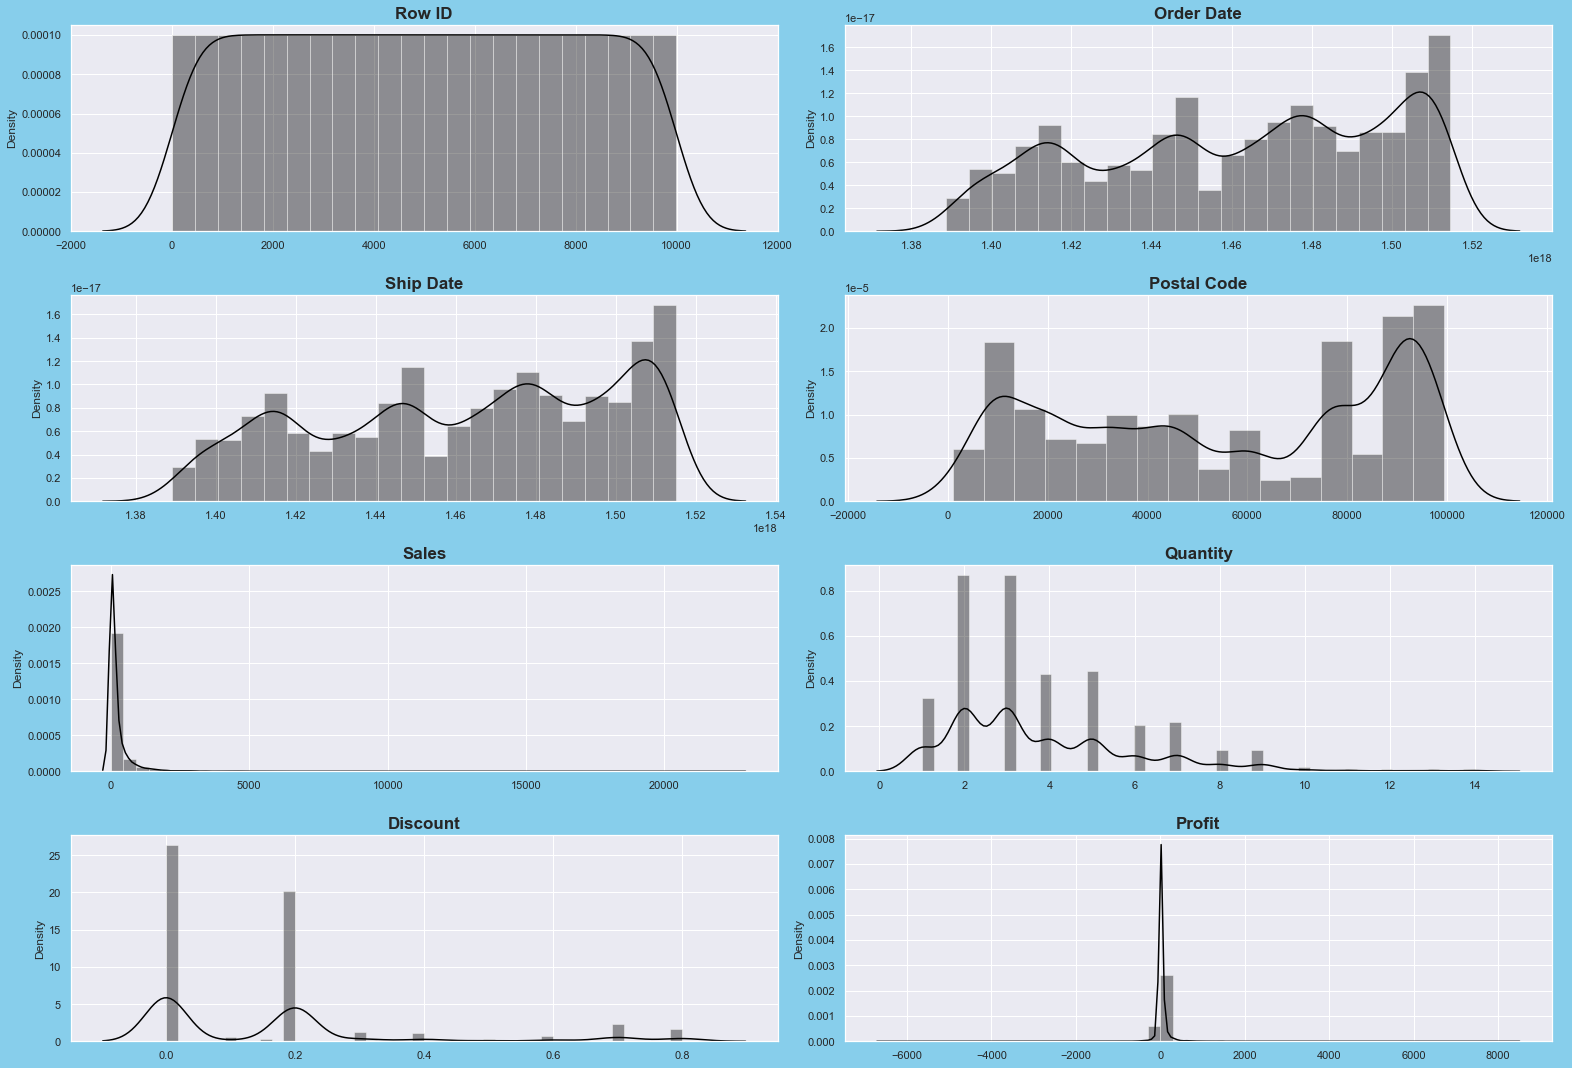

In [312]:
t=1
plt.figure(figsize=(22,15))
for i in a_lst:
    plt.subplot(4,2,t)
    sb.distplot(x=data2[i],color="black")
    plt.title(i,fontweight="bold",fontsize=17)
    t=t+1
    plt.tight_layout()
plt.show();

In [313]:
c_lst=["Sales",'Quantity', 'Discount', 'Profit']

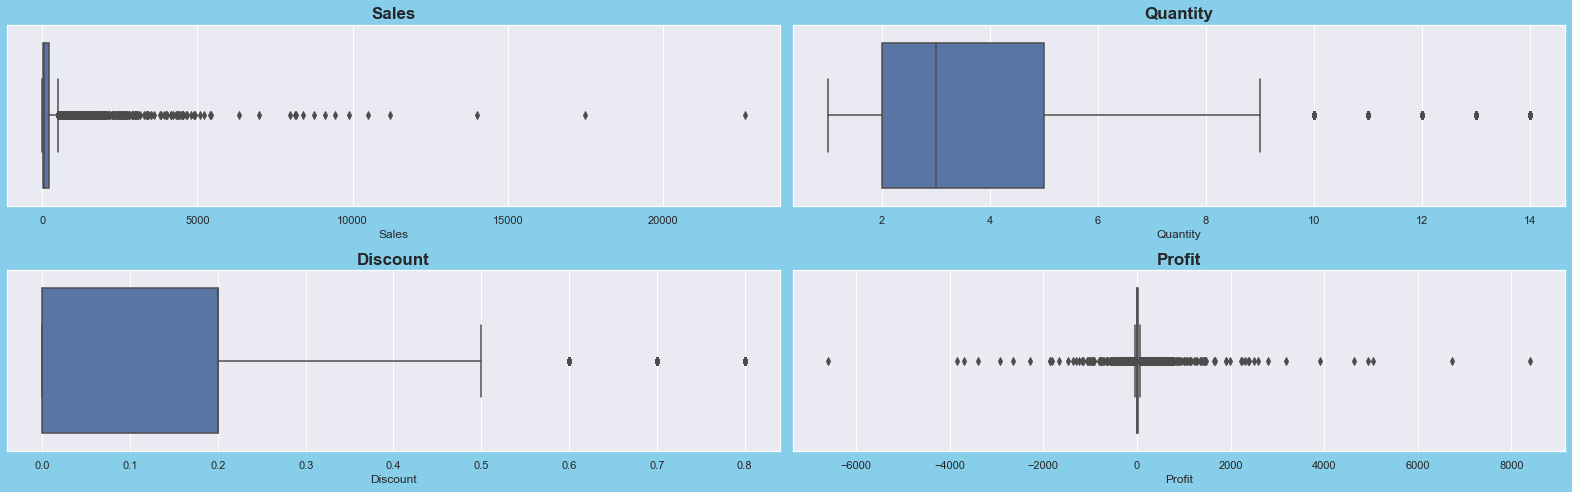

In [314]:
t=1
plt.figure(figsize=(22,7))
for i in c_lst:
    plt.subplot(2,2,t)
    sb.boxplot(x=data[i])
    plt.title(i,fontweight="bold",fontsize=17)
    t=t+1
    plt.tight_layout()
plt.show();

#### Evaery numeric data has outlier

In [315]:
g_lst=['Ship Mode','Segment', 'Country', 'City', 'State','Region','Category', 'Sub-Category','Product Name']

In [316]:
def count(col1):
    sb.countplot(data[col1])
    plt.title(col1,fontsize=15,fontweight="bold")

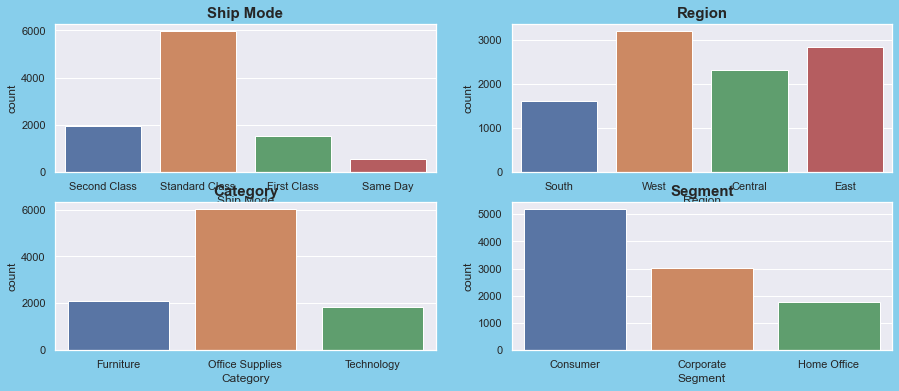

In [317]:
plt.figure(figsize=(15,6))
plt.subplot(221)
count('Ship Mode')
plt.subplot(222)
count('Region')
plt.subplot(223)
count('Category')
plt.subplot(224)
count('Segment')
plt.show();

- In the ship model maximum ship mode are standard 
- maximum data is present for west region
- office suppliers is the more among category
- consumer segment data  is mostly presented

## Sales and Subcategory

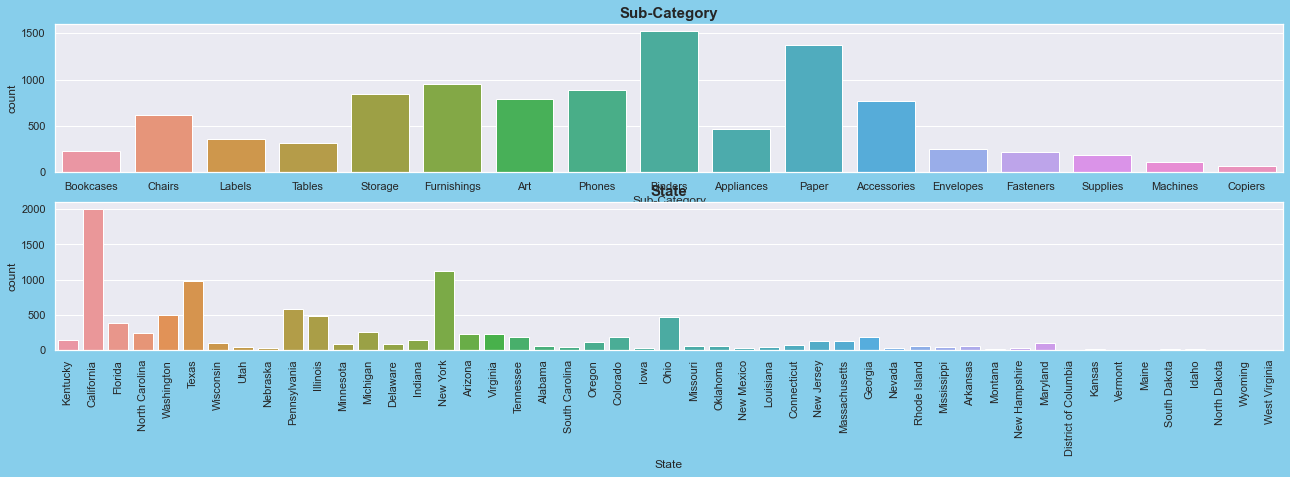

In [318]:
plt.figure(figsize=(22,6))
plt.subplot(211)
count('Sub-Category')
plt.subplot(212)
count('State')
plt.xticks(rotation=90)
plt.show();

- Binders is maximum anong sub category
- data of california is maximum presented

In [319]:
def boxplot_bi(col1,col2,w=17,l=5):
    plt.figure(figsize=(w,l))
    sb.boxplot(x=data[col1],y=data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col1+" VS "+col2,fontsize=15,fontweight="bold")
    plt.show();

### Sales vs category

In [320]:
def groupby(colwise,col):
    return(data.groupby(data[colwise]).agg({col:['mean','median','max','min']}))

In [321]:
groupby('Category','Sales')

Sales                           
                       mean   median        max    min
Category                                              
Furniture        349.834887  182.220   4416.174  1.892
Office Supplies  119.324101   27.418   9892.740  0.444
Technology       452.709276  166.160  22638.480  0.990

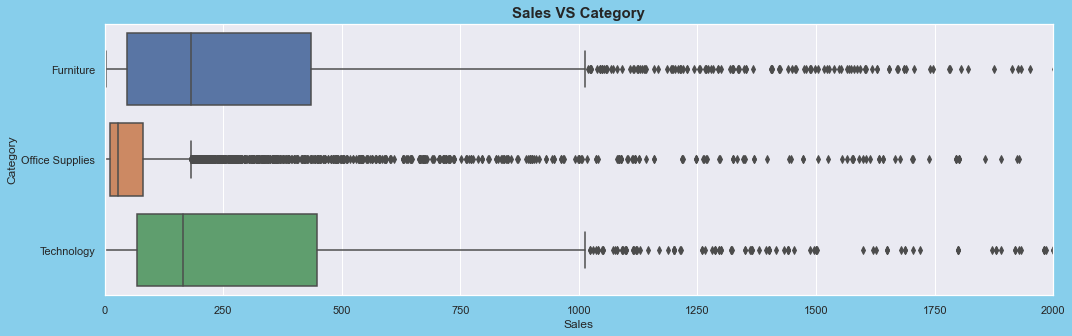

In [322]:
plt.figure(figsize=(17,5))
sb.boxplot(x=data['Sales'],y=data['Category'])
plt.title('Sales'+" VS "+'Category',fontsize=15,fontweight="bold")
plt.xlim(0,2000)
plt.show();

- Sales are more in technology category

## category vs profit

In [323]:
groupby('Category', 'Profit')

Profit                              
                      mean   median       max        min
Category                                                
Furniture         8.699327   7.7748  1013.127 -1862.3124
Office Supplies  20.327050   6.8824  4946.370 -3701.8928
Technology       78.752002  25.0182  8399.976 -6599.9780

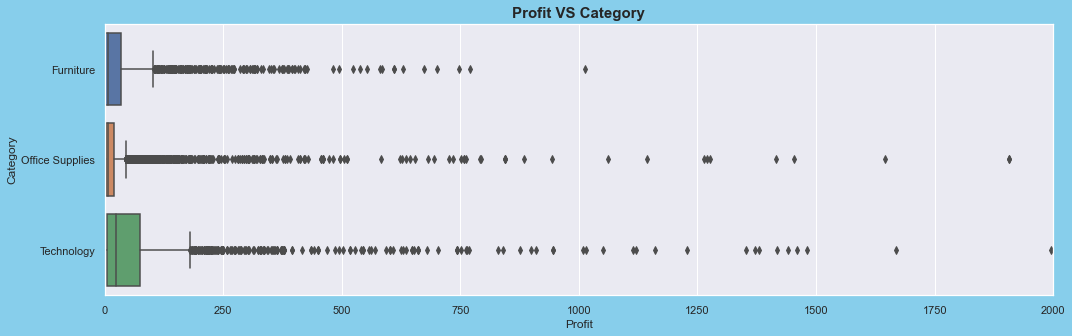

In [324]:
plt.figure(figsize=(17,5))
sb.boxplot(x=data['Profit'],y=data['Category'])
plt.title('Profit'+" VS "+'Category',fontsize=15,fontweight="bold")
plt.xlim(0,2000)
plt.show();

- profit also more in category

In [325]:
def countplot_bi(col1,col2):
    plt.figure(figsize=(17,4))
    sb.countplot(data[col1],hue=data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    t=col1+" VS "+col2
    plt.title(t,fontweight="bold",fontsize=15)

### Subcategory vs category

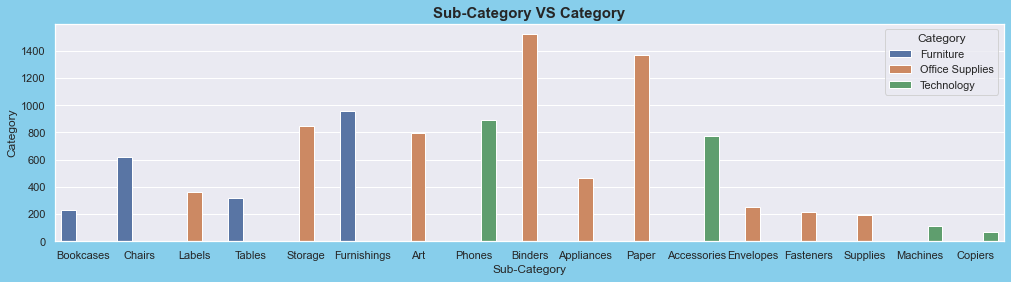

In [326]:
countplot_bi('Sub-Category','Category')

- in furniture category ,Furnishings subcategory are more

-----------------------------------------------------------------------------------------

### Furniture data

In [327]:
sales_data=data1[data1['Category']=='Furniture']

In [328]:
sales_data.head(3)
sales_data.shape
sales_data.size

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


(2121, 21)

44541

In [329]:
data=sales_data[["Sales","Order Date","Quantity","Discount"]]
data.head()
data.tail()

,Sales,Order Date,Quantity,Discount
0,261.9600,2016-11-08,2,0.00
1,731.9400,2016-11-08,3,0.00
3,957.5775,2015-10-11,5,0.45
5,48.8600,2014-06-09,7,0.00
10,1706.1840,2014-06-09,9,0.20


,Sales,Order Date,Quantity,Discount
9962,383.4656,2015-03-19,4,0.32
9964,13.4000,2016-12-05,1,0.00
9980,85.9800,2015-09-06,1,0.00
9989,25.2480,2014-01-21,3,0.20
9990,91.9600,2017-02-26,2,0.00


In [330]:
data=data.sort_values(['Order Date'])
data.head()
data.tail()

,Sales,Order Date,Quantity,Discount
7474,2573.820,2014-01-06,9,0.0
7660,76.728,2014-01-07,3,0.6
866,51.940,2014-01-10,1,0.0
716,9.940,2014-01-11,2,0.0
2978,545.940,2014-01-13,6,0.0


,Sales,Order Date,Quantity,Discount
7636,258.750,2017-12-29,3,0.0
7632,1207.840,2017-12-29,8,0.0
5131,101.120,2017-12-29,8,0.0
7635,300.980,2017-12-29,1,0.0
906,323.136,2017-12-30,4,0.2


In [331]:
data.columns

Index(['Sales', 'Order Date', 'Quantity', 'Discount'], dtype='object')

In [332]:
data=pd.pivot_table(data,values=["Sales","Quantity","Discount"],index=['Order Date'],aggfunc='sum')
data.head()
data.tail()

,Discount,Quantity,Sales
Order Date,,,
2014-01-06,0.00,9,2573.820
2014-01-07,0.60,3,76.728
2014-01-10,0.00,1,51.940
2014-01-11,0.00,2,9.940
2014-01-13,0.15,9,879.939


,Discount,Quantity,Sales
Order Date,,,
2017-12-24,0.50,14,1393.4940
2017-12-25,0.80,14,832.4540
2017-12-28,2.02,17,551.2568
2017-12-29,0.20,26,2330.7180
2017-12-30,0.20,4,323.1360


In [333]:
data.shape

(889, 3)

In [334]:
data.size

2667

In [335]:
data.dtypes

Discount    float64
Quantity      int64
Sales       float64
dtype: object

In [336]:
df=data

<AxesSubplot:xlabel='Order Date'>

Text(0.5, 1.0, 'SALES')

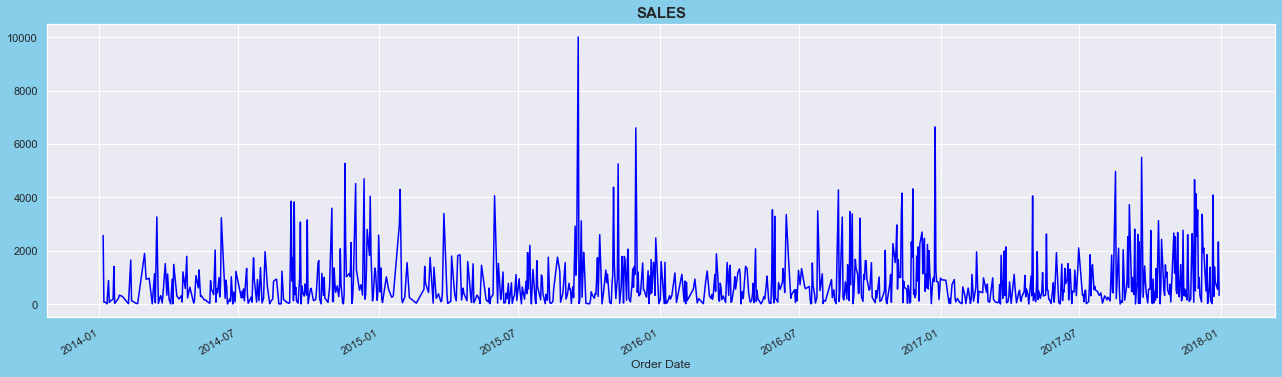

In [337]:
data["Sales"].plot(figsize=(22,6),c="blue")
plt.title("SALES",fontweight="bold",fontsize=15)

In [338]:
data.resample(rule="M").mean().head()

,Discount,Quantity,Sales
Order Date,,,
2014-01-31,0.207692,5.384615,480.194231
2014-02-28,0.160000,4.600000,367.931600
2014-03-31,0.447059,7.705882,857.291529
2014-04-30,0.246429,5.785714,567.488357
2014-05-31,0.384375,6.062500,432.049188


<AxesSubplot:xlabel='Order Date'>

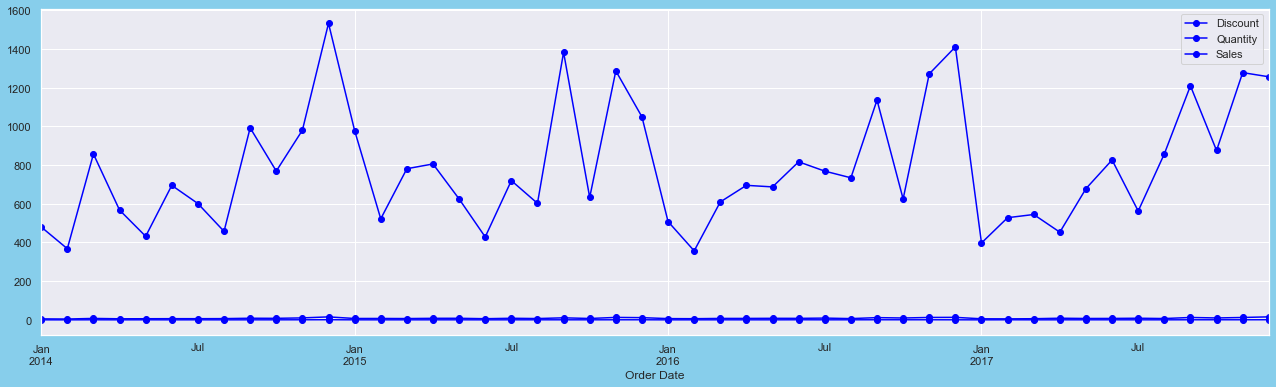

In [339]:
data.resample(rule="M").mean().plot(figsize=(22,6),c="blue",marker="o")

- In 2014,2016 the december month has the maximum sales
- in 2015, september has the maximum average sales
- in 2017, november has the maximum average sales

In [340]:
data.resample(rule="Y").mean().head()

,Discount,Quantity,Sales
Order Date,,,
2014-12-31,0.383300,8.115000,785.964266
2015-12-31,0.383367,8.919598,856.875563
2016-12-31,0.428534,9.452586,857.333776
2017-12-31,0.451628,9.445736,834.834377


<AxesSubplot:xlabel='Order Date'>

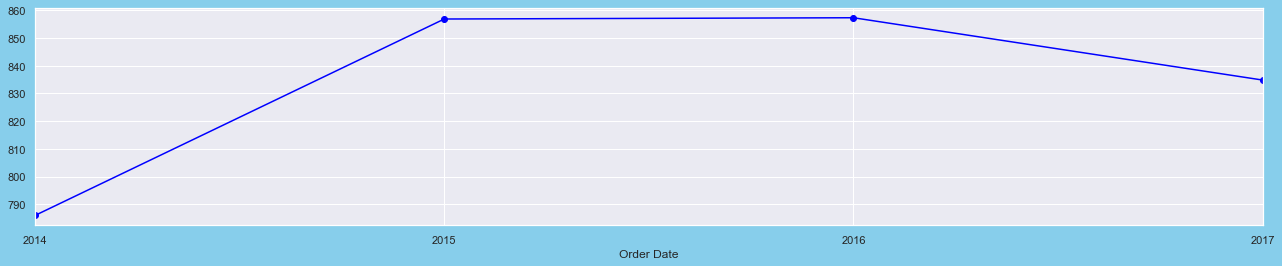

In [341]:
data["Sales"].resample(rule="Y").mean().plot(figsize=(22,4),c="blue",marker="o")

- maximum sales is done in 2015 and 2016

In [342]:
data.resample(rule="W").mean().sort_values(by="Sales",ascending=False).head()
data.resample(rule="W").mean().max()

,Discount,Quantity,Sales
Order Date,,,
2015-09-20,0.600,11.4,2642.6288
2016-06-19,0.900,20.5,2519.5795
2015-11-08,0.390,13.8,2460.2222
2014-11-23,0.975,16.5,2408.6980
2014-12-21,0.860,19.0,2355.9624


Discount       1.7000
Quantity      23.0000
Sales       2642.6288
dtype: float64

<AxesSubplot:xlabel='Order Date'>

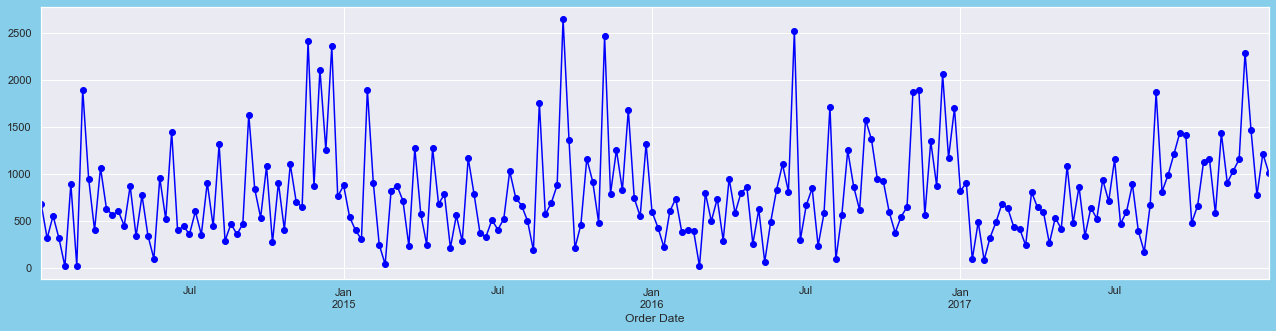

In [343]:
data["Sales"].resample(rule="W").mean().plot(figsize=(22,5),c="blue",marker="o")

In [344]:
data=data.resample(rule="W").mean()
data.head(10)
data.shape


,Discount,Quantity,Sales
Order Date,,,
2014-01-12,0.150000,3.750000,678.107000
2014-01-19,0.387500,6.000000,312.618250
2014-01-26,0.066667,8.666667,551.986000
2014-02-02,0.175000,2.500000,311.833000
2014-02-09,0.000000,2.000000,14.560000
2014-02-16,0.100000,6.000000,889.809000
2014-02-23,0.300000,4.500000,22.740000
2014-03-02,1.700000,23.000000,1893.995000
2014-03-09,0.650000,8.500000,947.893000


(208, 3)

In [345]:
df=data["Sales"]

In [346]:
weekly_sales=df
weekly_sales.head()
weekly_sales.shape

Order Date
2014-01-12    678.10700
2014-01-19    312.61825
2014-01-26    551.98600
2014-02-02    311.83300
2014-02-09     14.56000
Freq: W-SUN, Name: Sales, dtype: float64

(208,)

In [347]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [348]:
decomposition=seasonal_decompose(df,period=52)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_resud=decomposition.resid

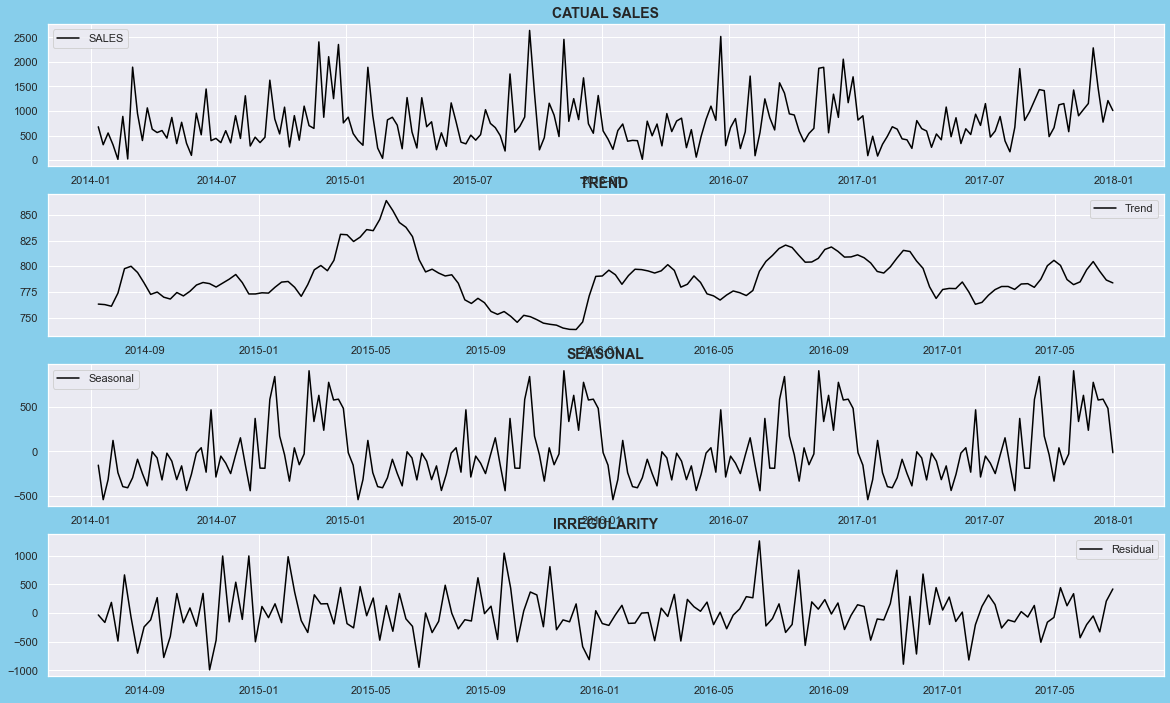

In [349]:
fig,ax=plt.subplots(4,1,figsize=(20,12))
plt.subplot(411)
plt.plot(df,label='SALES',c="black")
plt.title("CATUAL SALES",fontsize=14,fontweight="bold")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(df.index,d_trend,label='Trend',c="black")
plt.title("TREND ",fontsize=14,fontweight="bold")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(df.index,d_seasonal,label='Seasonal',c="black")
plt.title("SEASONAL",fontsize=14,fontweight="bold")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(df.index,d_resud,label='Residual',c="black")
plt.title("IRREGULARITY",fontsize=14,fontweight="bold")
plt.legend(loc='best')

plt.show();

- IN the sales graph shows ACTUAL SALES
-  in the trend graph,it shows a upward trend
-  in the seasonal graph , it shows the graph is  seasonal 
-  in the irregularity graph , it shows some irregularity because the fluctuation in the graph is present 

In [350]:
from statsmodels.tsa.stattools import adfuller

In [351]:
def adf_test(series):
    result=adfuller(series)
    print(result)
    print(f"adf statistics={result[0]}")
    print(f"p value={result[1]}")
    if result[1]<=0.05:
        print("strong evidance against null hypothesis,reject null hypothesis.DATA HAS NO UNIT root and data is stationary")
    else:
        print("weak evidance against null hypothesis,rtime series has a unit root and data is not stationary")

In [352]:
adf_test(df)

(-5.301533884276887, 5.43573504136459e-06, 3, 204, {'1%': -3.462818103072159, '5%': -2.8758145932936805, '10%': -2.574378674548251}, 2943.1630840093426)
adf statistics=-5.301533884276887
p value=5.43573504136459e-06
strong evidance against null hypothesis,reject null hypothesis.DATA HAS NO UNIT root and data is stationary


In [353]:
df.mean()
df.std()

789.3531363701929

516.9270297313235

In [354]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

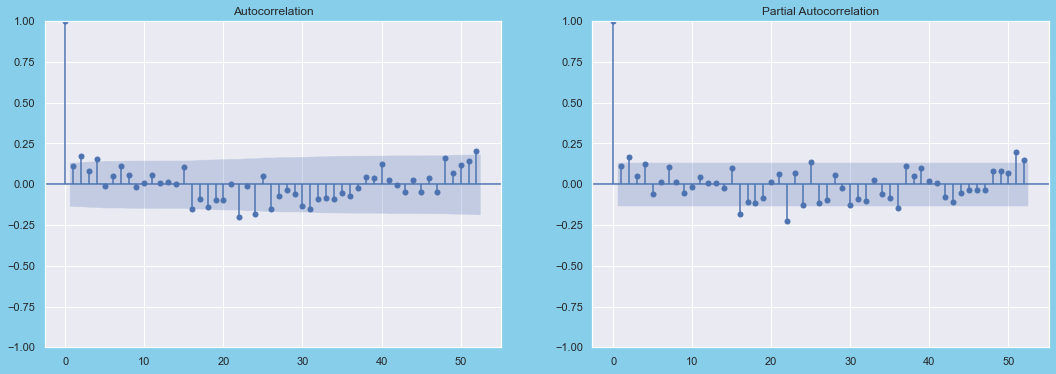

In [355]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
acf=plot_acf(df,lags=52,ax=ax[0])
pacf=plot_pacf(df,lags=52,ax=ax[1])
plt.show()

- in the autocorrelation graph 5 lags i.e. (lag 2,4,22,24,52 ) has a significance of the data.
    - q value can can be 0 to 5
- in the partial autocorrelation graph  lags = (2,16,22,36,51) has  a significance of the data.
    - p value can be 0 to 5


In [356]:
train=df.iloc[:int(df.shape[0]*0.7)]
test=df.iloc[int(df.shape[0]*0.7):]
train.head(2)
train.tail(2)
test.head(2)
test.tail(2)

Order Date
2014-01-12    678.10700
2014-01-19    312.61825
Freq: W-SUN, Name: Sales, dtype: float64

Order Date
2016-10-09    589.3900
2016-10-16    372.0375
Freq: W-SUN, Name: Sales, dtype: float64

Order Date
2016-10-23    542.777333
2016-10-30    645.730667
Freq: W-SUN, Name: Sales, dtype: float64

Order Date
2017-12-24    1212.3405
2017-12-31    1009.3912
Freq: W-SUN, Name: Sales, dtype: float64

In [357]:
train.shape
test.shape

(145,)

(63,)

In [358]:
p_lst=list(range(0,6))
q_lst=list(range(0,6))
p_lst
q_lst

[0, 1, 2, 3, 4, 5]

[0, 1, 2, 3, 4, 5]

In [359]:
from statsmodels.tsa.arima.model import ARIMA

In [360]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [361]:
c1=0
mse_lst=[]
rmse_lst=[]
c_lst=[]
for i in p_lst:
    for j in q_lst:
        model_arima=ARIMA(train,order=(i,0,j)).fit()
        sales_forecast=model_arima.forecast(steps=63)
        c=str(i),"0",str(j)
        c_lst.append(c)
        mse=mean_squared_error(test,sales_forecast)
        mse_lst.append(mse)
        rmse=mean_squared_error(test,sales_forecast,squared=False)
        rmse_lst.append(rmse)
        c1=c1+1
        print(c1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [362]:
mse_df=pd.DataFrame({"MSE":mse_lst,"RMSE":rmse_lst},index=[c_lst])
mse_df

,MSE,RMSE
"(0, 0, 0)",250933.991802,500.933121
"(0, 0, 1)",250908.459624,500.907636
"(0, 0, 2)",250698.200108,500.697713
"(0, 0, 3)",251769.805555,501.766684
"(0, 0, 4)",253548.402270,503.535900
"(0, 0, 5)",252489.586350,502.483419
"(1, 0, 0)",250902.071107,500.901259
"(1, 0, 1)",250831.171990,500.830482
"(1, 0, 2)",252852.705249,502.844613
"(1, 0, 3)",252348.753523,502.343263


In [363]:
mse_df.sort_values(['MSE']).head()

,MSE,RMSE
"(5, 0, 5)",246634.765478,496.623364
"(4, 0, 2)",248323.579570,498.320760
"(2, 0, 5)",250075.581260,500.075576
"(3, 0, 4)",250237.248165,500.237192
"(2, 0, 4)",250285.784314,500.285703


# ARMA

--------------------------------------------------------------------------------------

In [364]:
p=5
q=5
d=0

In [365]:
model_arima=ARIMA(train,order=(p,d,q)).fit()

In [366]:
arma_fit=model_arima.fittedvalues
arma_fit

Order Date
2014-01-12    757.723218
2014-01-19    756.345369
2014-01-26    739.139101
2014-02-02    685.233259
2014-02-09    700.464223
                 ...    
2016-09-18    943.272651
2016-09-25    711.078660
2016-10-02    823.580454
2016-10-09    945.525781
2016-10-16    827.093086
Freq: W-SUN, Length: 145, dtype: float64

In [367]:
sale_forecast=model_arima.forecast(steps=63)

In [368]:
sale_forecast

2016-10-23    731.157019
2016-10-30    603.945990
2016-11-06    776.276842
2016-11-13    887.480787
2016-11-20    738.181056
                 ...    
2017-12-03    748.853157
2017-12-10    764.965199
2017-12-17    758.599223
2017-12-24    755.522682
2017-12-31    758.706068
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [369]:
sales_predicted=pd.DataFrame(sale_forecast)
sales_predicted.index=test.index
sales_predicted.shape
sales_predicted=sales_predicted.rename(columns={"predicted_mean":"sales predicted"})
sales_predicted.head()

(63, 1)

,sales predicted
Order Date,
2016-10-23,731.157019
2016-10-30,603.945990
2016-11-06,776.276842
2016-11-13,887.480787
2016-11-20,738.181056


In [370]:
actualvspredict=pd.DataFrame()
actualvspredict["actual sale"]=test

In [371]:
actualvspredict=pd.concat([actualvspredict,sales_predicted],axis=1)
actualvspredict.head()

,actual sale,sales predicted
Order Date,,
2016-10-23,542.777333,731.157019
2016-10-30,645.730667,603.945990
2016-11-06,1871.214160,776.276842
2016-11-13,1891.064333,887.480787
2016-11-20,555.995200,738.181056


In [372]:
future_forecast1=model_arima.forecast(steps=143)[-80:]
future_forecast1

2018-01-07    752.732672
2018-01-14    764.134858
2018-01-21    757.832186
2018-01-28    752.813885
2018-02-04    760.854464
                 ...    
2019-06-16    757.469022
2019-06-23    758.217431
2019-06-30    757.255325
2019-07-07    757.914357
2019-07-14    757.845512
Freq: W-SUN, Name: predicted_mean, Length: 80, dtype: float64

In [373]:
import statsmodels.api as sm
pvalue=sm.stats.acorr_ljungbox(model_arima.resid,lags=[1],return_df=True)['lb_pvalue'].values

In [374]:
if pvalue<0.05:
    print("not a good model")
else:
    print("good model")
pvalue

good model


array([0.98991767])

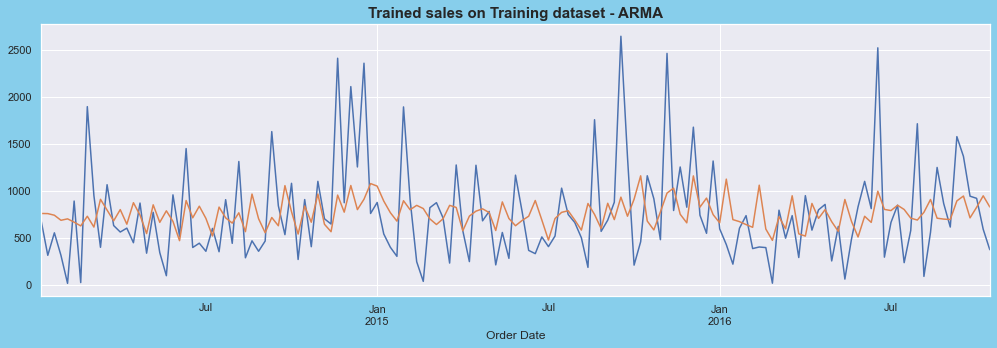

In [375]:
plt.figure(figsize=(17,5))
train.plot()
arma_fit.plot()
plt.title("Trained sales on Training dataset - ARMA",fontweight="bold",fontsize=15)
plt.show();

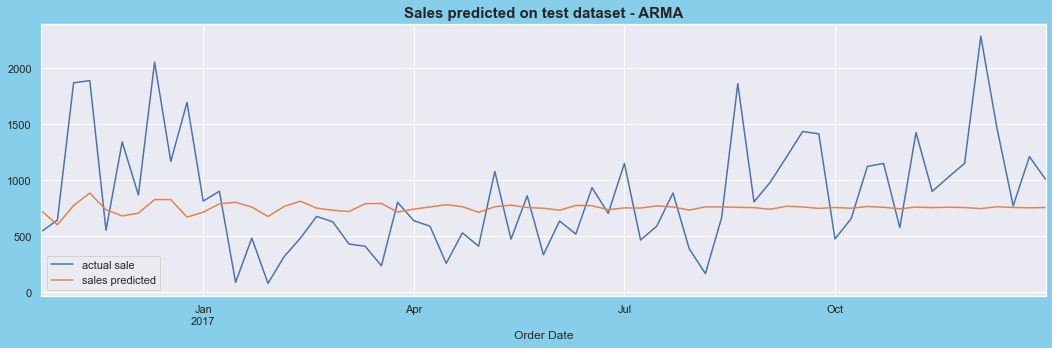

In [376]:
actualvspredict.plot(figsize=(18,5))
plt.title("Sales predicted on test dataset - ARMA",fontweight="bold",fontsize=15)
plt.show();

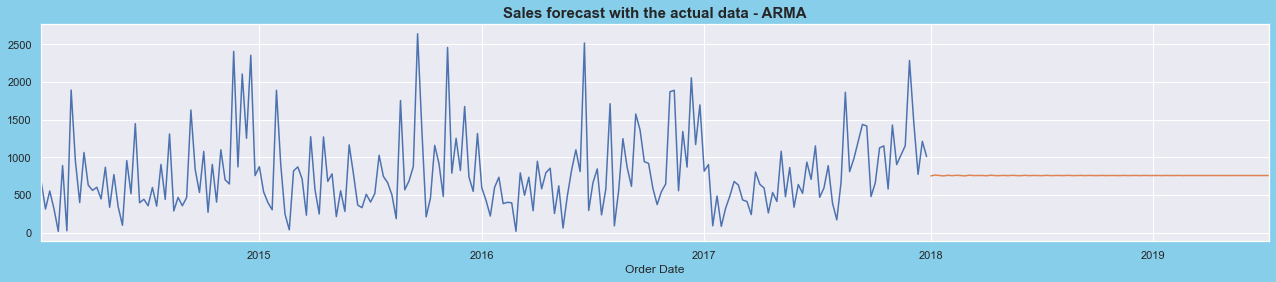

In [377]:
plt.figure(figsize=(22,4))
df.plot()
future_forecast1.plot()
plt.title("Sales forecast with the actual data - ARMA",fontweight="bold",fontsize=15)
plt.show();

In [378]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  145
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -1107.364
Date:                Mon, 14 Nov 2022   AIC                           2238.728
Time:                        03:41:37   BIC                           2274.449
Sample:                    01-12-2014   HQIC                          2253.243
                         - 10-16-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        757.7232     90.746      8.350      0.000     579.865     935.581
ar.L1         -0.4255      0.374     -1.138      0.255      -1.158       0.307
ar.L2         -0.4509      0.411     -1.098      0.272      -1.256       0.354
ar.L3          0.1056      0.449      0.235      0.814      -0.774       0.985
ar.L4          0.0508      0.338      0.150      0.881      -0.612       0.714
ar.L5          0.6792      0.285      2.387      0.017       0.121       1.237
ma.L1          0.4578      0.430      1.065      0.287      -0.385       1.300
ma.L2          0.6389      0.448      1.427      0.154      -0.239       1.517
ma.L3          0.0291      0.561      0.052      0.959      -1.071       1.129
ma.L4          0.1104      0.433      0.255      0.799      -0.738       0.959
ma.L5         -0.7164      0.421     -1.702      0.089      -1.541       0.108
sigma2        2.7e+05   6.69e+04      4.037      0.000    1.39e+05    4.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.22
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             1.12
Prob(H) (two-sided):                  0.99   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [379]:
mse=mean_squared_error(test,sale_forecast)
mse

246634.76547773037

In [380]:
rmse=mean_squared_error(test,sale_forecast,squared=False)
rmse

496.623363805742

----------------------------------------------------------------

## SARIMA

In [381]:
from pmdarima.arima import auto_arima
ml_sarima=auto_arima(train,start_p=0,max_p=5,start_q=0,max_q=5,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2230.956, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2232.938, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2233.029, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2392.839, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2234.821, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.162 seconds


In [382]:
p_lst
q_lst

[0, 1, 2, 3, 4, 5]

[0, 1, 2, 3, 4, 5]

In [383]:
p=1
d=0
q=1
model_sarima=sm.tsa.statespace.SARIMAX(train,order=(p,0,q),seasonal_order=(p,d,q,52)).fit()

In [384]:
sarima_fit=model_sarima.fittedvalues
sarima_fit

Order Date
2014-01-12       0.000000
2014-01-19     408.039743
2014-01-26     372.191714
2014-02-02     421.290710
2014-02-09     397.810707
                 ...     
2016-09-18    1043.293126
2016-09-25     842.538600
2016-10-02     684.829829
2016-10-09     700.972817
2016-10-16     824.289337
Freq: W-SUN, Length: 145, dtype: float64

In [385]:
sale_forecast2=model_sarima.forecast(steps=63)

In [386]:
sale_forecast2

2016-10-23     770.573575
2016-10-30     724.356641
2016-11-06    1012.447276
2016-11-13     758.409705
2016-11-20     878.093504
                 ...     
2017-12-03     815.429784
2017-12-10     760.373772
2017-12-17     761.034726
2017-12-24     784.685373
2017-12-31     749.508819
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [387]:
sales_predicted2=pd.DataFrame(sale_forecast2)
sales_predicted2.index=test.index
sales_predicted2.shape
sales_predicted2=sales_predicted2.rename(columns={"predicted_mean":"sales predicted"})
sales_predicted2.head()

(63, 1)

,sales predicted
Order Date,
2016-10-23,770.573575
2016-10-30,724.356641
2016-11-06,1012.447276
2016-11-13,758.409705
2016-11-20,878.093504


In [388]:
actualvspredict2=pd.DataFrame()
actualvspredict2["actual sale"]=test

In [389]:
actualvspredict2=pd.concat([actualvspredict2,sales_predicted2],axis=1)
actualvspredict2.head()

,actual sale,sales predicted
Order Date,,
2016-10-23,542.777333,770.573575
2016-10-30,645.730667,724.356641
2016-11-06,1871.214160,1012.447276
2016-11-13,1891.064333,758.409705
2016-11-20,555.995200,878.093504


In [390]:
future_forecast2=model_sarima.forecast(steps=143)[-80:]
future_forecast2

2018-01-07    737.932401
2018-01-14    725.557075
2018-01-21    744.254866
2018-01-28    765.073668
2018-02-04    737.975768
                 ...    
2019-06-16    784.438097
2019-06-23    747.837468
2019-06-30    753.648365
2019-07-07    757.179499
2019-07-14    748.380451
Freq: W-SUN, Name: predicted_mean, Length: 80, dtype: float64

In [391]:
pvalue3=sm.stats.acorr_ljungbox(model_sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values

In [392]:
if pvalue3<0.05:
    print("not a good model")
else:
    print("good model")
pvalue3

good model


array([0.67328291])

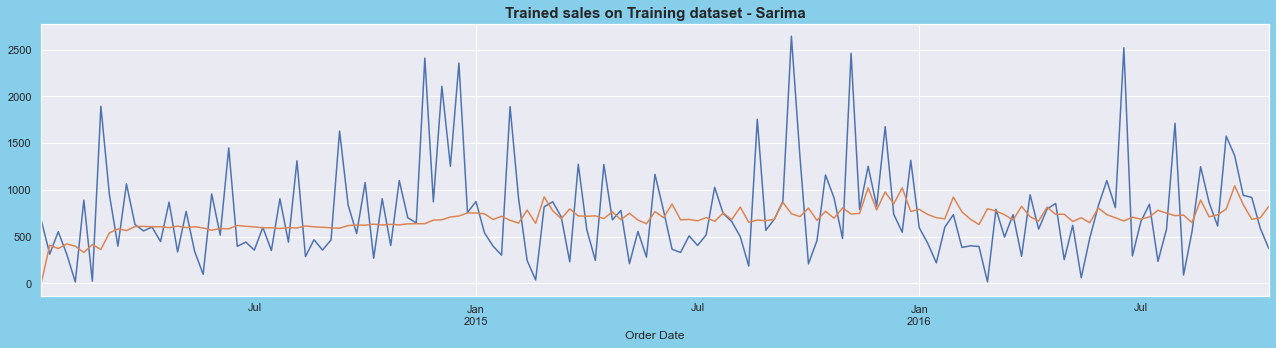

In [393]:
plt.figure(figsize=(22,5))
train.plot()
sarima_fit.plot()
plt.title("Trained sales on Training dataset - Sarima",fontweight="bold",fontsize=15)
plt.show();

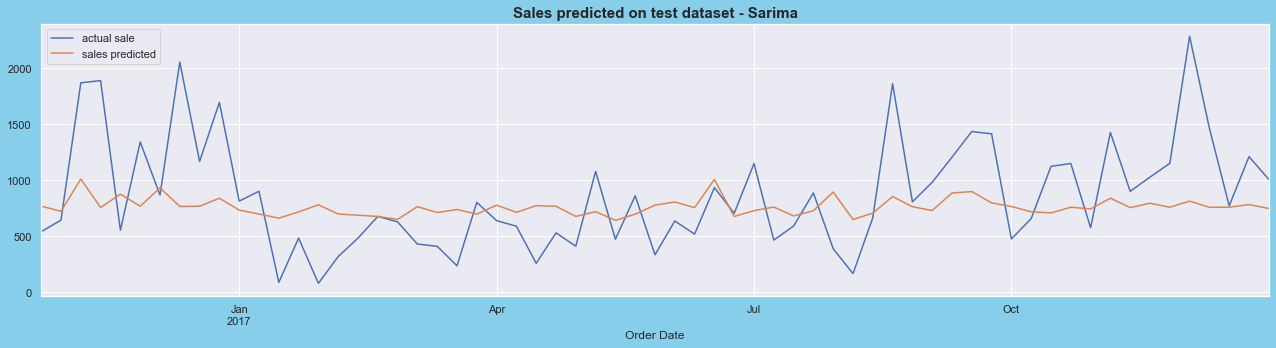

In [394]:
actualvspredict2.plot(figsize=(22,5))
plt.title("Sales predicted on test dataset - Sarima",fontweight="bold",fontsize=15)
plt.show();

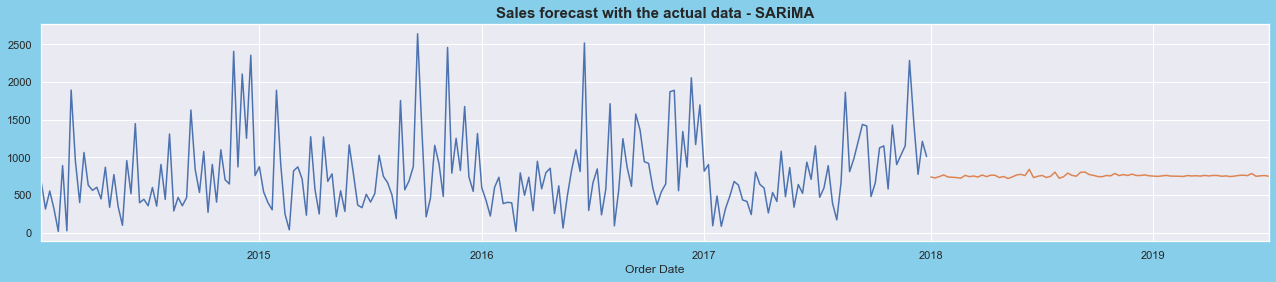

In [395]:
plt.figure(figsize=(22,4))
df.plot()
future_forecast2.plot()
plt.title("Sales forecast with the actual data - SARiMA",fontweight="bold",fontsize=15)
plt.show();

In [396]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  145
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 52)   Log Likelihood               -1115.591
Date:                            Mon, 14 Nov 2022   AIC                           2241.182
Time:                                    03:41:55   BIC                           2256.065
Sample:                                01-12-2014   HQIC                          2247.229
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   6507.048      0.000       1.000       1.000
ma.L1         -0.9983      0.097    -10.345      0.000      -1.187      -0.809
ar.S.L52       0.3326      1.181      0.282      0.778      -1.982       2.647
ma.S.L52      -0.1816      1.236     -0.147      0.883      -2.604       2.241
sigma2      2.702e+05   4.69e-06   5.76e+10      0.000     2.7e+05     2.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                95.05
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.50
Prob(H) (two-sided):                  0.51   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+27. Standard errors may be unstable.
"""

In [398]:
mse2=mean_squared_error(test,sale_forecast2)
mse2

223883.58669360064

In [399]:
rmse2=mean_squared_error(test,sale_forecast2,squared=False)
rmse2

473.1633826635369

------------------------------------------------------------------------------------------------

##  Sarimax

In [421]:
train=data.iloc[:int(weekly_sales.shape[0]*0.7)]
test=data.iloc[int(weekly_sales.shape[0]*0.7):]

In [422]:
train_sale=train.Sales
test_sale=test.Sales
train_sale.shape
test_sale.shape

(145,)

(63,)

In [423]:
exog_train=train.drop(['Sales'],axis=1)
exog_test=test.drop(['Sales'],axis=1)


In [424]:
exog_train.shape
exog_test.shape

(145, 2)

(63, 2)

In [425]:
model_sarimax=sm.tsa.statespace.SARIMAX(train_sale,order=(1,0,1),seasonal_order=(1,0,1,52),exog=exog_train).fit()

In [426]:
sarimax_fit=model_sarimax.fittedvalues
sarimax_fit

Order Date
2014-01-12     346.744641
2014-01-19     525.593518
2014-01-26     789.568401
2014-02-02     277.283402
2014-02-09     184.562151
                 ...     
2016-09-18    1217.091516
2016-09-25    1229.666989
2016-10-02     854.345286
2016-10-09     758.895667
2016-10-16    1055.579998
Freq: W-SUN, Length: 145, dtype: float64

In [427]:
fcast_test=model_sarimax.forecast(test_sale.shape[0],exog=exog_test)
fcast_test

2016-10-23     839.883278
2016-10-30    1224.751106
2016-11-06    1957.002208
2016-11-13    1400.269638
2016-11-20     857.312808
                 ...     
2017-12-03    2022.277071
2017-12-10    1753.844443
2017-12-17     946.066037
2017-12-24    1125.080603
2017-12-31    1425.161850
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [428]:
sales_predicted3=pd.DataFrame(fcast_test)
sales_predicted3.index=test_sale.index
sales_predicted3.shape
sales_predicted3=sales_predicted3.rename(columns={"predicted_mean":"sales predicted"})
sales_predicted3.head()

(63, 1)

,sales predicted
Order Date,
2016-10-23,839.883278
2016-10-30,1224.751106
2016-11-06,1957.002208
2016-11-13,1400.269638
2016-11-20,857.312808


In [429]:
actualvspredict3=pd.DataFrame()
actualvspredict3["actual sale"]=test_sale

In [430]:
actualvspredict3=pd.concat([actualvspredict3,sales_predicted3],axis=1)
actualvspredict3.head()

,actual sale,sales predicted
Order Date,,
2016-10-23,542.777333,839.883278
2016-10-30,645.730667,1224.751106
2016-11-06,1871.214160,1957.002208
2016-11-13,1891.064333,1400.269638
2016-11-20,555.995200,857.312808


In [431]:
pvalue4=sm.stats.acorr_ljungbox(model_sarimax.resid,lags=[1],return_df=True)['lb_pvalue'].values

In [432]:
if pvalue4<0.05:
    print("not a good model")
else:
    print("good model")
pvalue4

good model


array([0.87062727])

In [433]:
mse3=mean_squared_error(test["Sales"],fcast_test)
mse3

83897.77404160838

In [434]:
rmse3=mean_squared_error(test["Sales"],fcast_test,squared=False)
rmse3

289.65112470281963

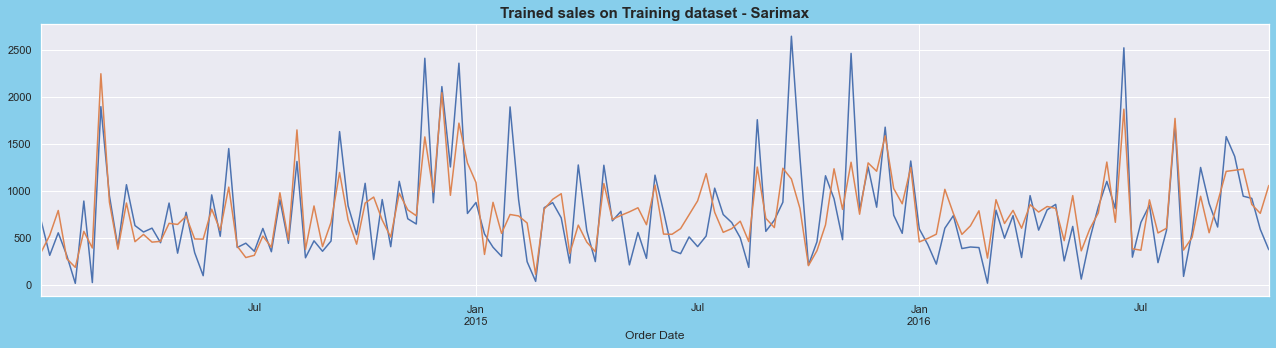

In [435]:
train["Sales"].plot(figsize=(22,5))
sarimax_fit.plot(figsize=(22,5))
plt.title("Trained sales on Training dataset - Sarimax",fontweight="bold",fontsize=15)
plt.show();

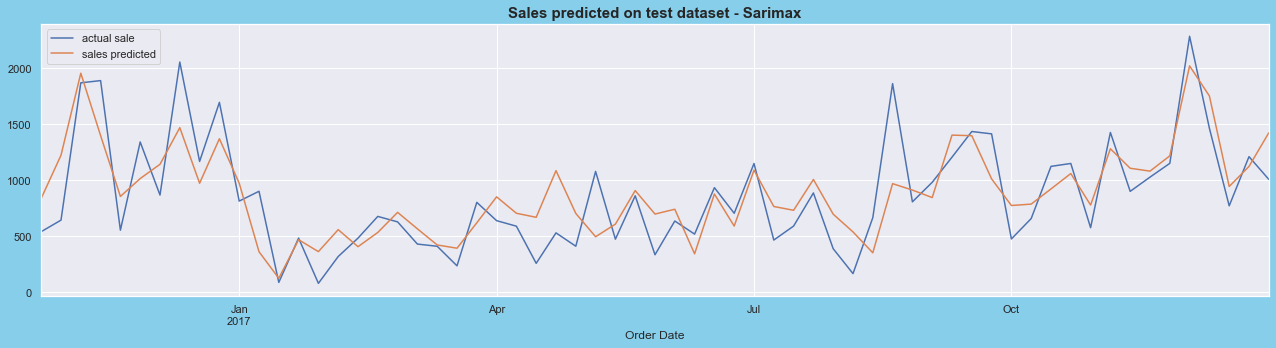

In [436]:
actualvspredict3.plot(figsize=(22,5))
plt.title("Sales predicted on test dataset - Sarimax",fontweight="bold",fontsize=15)
plt.show();

In [437]:
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  145
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 52)   Log Likelihood               -1047.239
Date:                            Mon, 14 Nov 2022   AIC                           2108.478
Time:                                    11:37:34   BIC                           2129.315
Sample:                                01-12-2014   HQIC                          2116.945
                                     - 10-16-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Discount      98.5249    149.641      0.658      0.510    -194.766     391.815
Quantity      88.5242      7.349     12.046      0.000      74.121     102.928
ar.L1          0.3207      0.581      0.552      0.581      -0.818       1.460
ma.L1         -0.4629      0.550     -0.842      0.400      -1.540       0.614
ar.S.L52       0.9674      3.763      0.257      0.797      -6.408       8.342
ma.S.L52      -0.9178      5.474     -0.168      0.867     -11.647       9.811
sigma2      1.061e+05   1.74e+05      0.608      0.543   -2.36e+05    4.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               135.00
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             1.34
Prob(H) (two-sided):                  0.88   Kurtosis:                         6.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [445]:
model_sarimax1=sm.tsa.statespace.SARIMAX(data.Sales,order=(1,0,1),seasonal_order=(1,0,1,52),exog=data[["Discount","Quantity"]]).fit()

In [447]:
future_forecast4=model_sarimax1.forecast(len(data),exog=data[["Discount","Quantity"]])
future_forecast4

2018-01-07     460.896937
2018-01-14     536.656900
2018-01-21     759.778635
2018-01-28     349.156998
2018-02-04     186.198699
                 ...     
2021-11-28    1982.317571
2021-12-05    1737.792991
2021-12-12     924.743638
2021-12-19    1132.498327
2021-12-26    1363.892733
Freq: W-SUN, Name: predicted_mean, Length: 208, dtype: float64

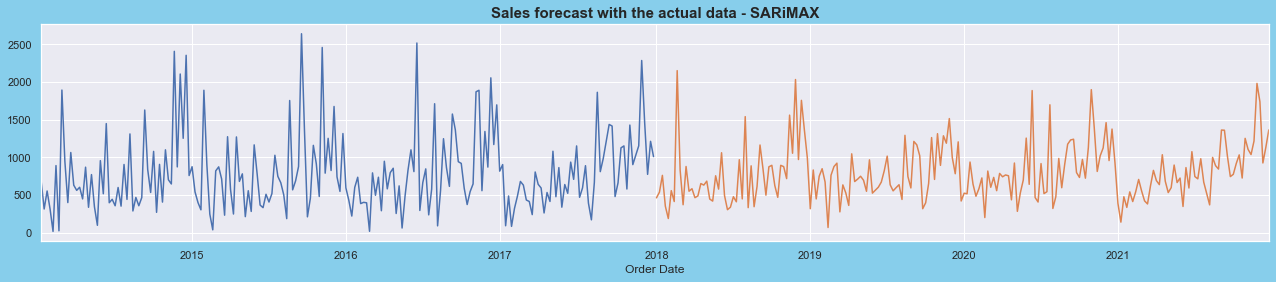

In [448]:
plt.figure(figsize=(22,4))
df.plot()
future_forecast4.plot()
plt.title("Sales forecast with the actual data - SARiMAX",fontweight="bold",fontsize=15)
plt.show();

# EVALUATION

----------------------------------------------------------------------------------------

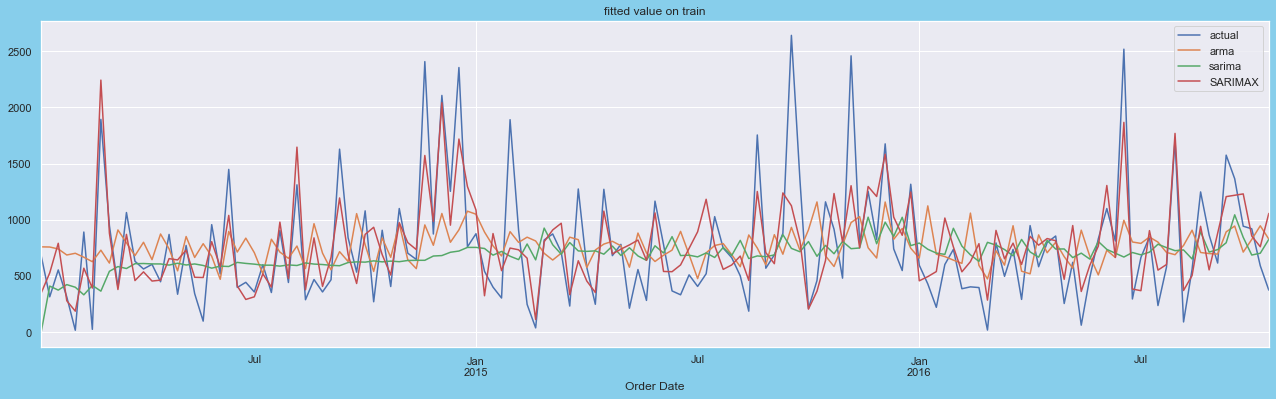

In [294]:
plt.figure(figsize=(22,6))
train["Sales"].plot(label="actual",figsize=(22,6))
arma_fit.plot(label="arma")
sarima_fit.plot(label="sarima")
sarimax_fit.plot(label="SARIMAX")
plt.title("fitted value on train")
plt.legend()
plt.show();

In [418]:
dic={"MSE":[246634.765,246634.7654,83897.7740],"RMSE":[496.623,473.163,289.6511]}

In [420]:
pd.DataFrame(dic,index=["ARMA","SARIMA","SARIMAX"])

,MSE,RMSE
ARMA,246634.7650,496.6230
SARIMA,246634.7654,473.1630
SARIMAX,83897.7740,289.6511


## After observing the performance and graph ,it clearly understood that sarimax outperform arma , sarima

---------------------------------------------------------------------------------------------------